# Reading

Read the second and third chapter (pg 32-67) of *Weapons of Math Destruction* and summarize the main ideas below.

1. **Mortgage risk scoring played a big role in the 2008 financial crisis. What was wrong with the scoring system?**
The mortage risk was scored by analysts and was not analyzed by others and the analysts were essentailly rewarded for selling more so it was in there interest to score mortages as less risky and sell them then to truthfully evaluate them. Much of the risk analysis was taken at the word of the analysts and the fancy math equations and thus were falsley sold. In addition people did not think that everyone could default at once so as long as this market kept progressing it would keep generating. The models that were responsible for deciding who got AAA loans positive reinforced themselves in order to keep customers happy and thus were biased to give out riskier loans.


2. **O'Neil criticizes the US News college ranking system. What problems does she see with this model?**
It uses lots of metrics to try to measure and represent non-quantifiable aspects of college like happiness. In addition the model created a strong feedback loop. Getting ranked higher would increase a college stats in terms of SAT scores and other predictors as its perception increased and same was true on the other end. If the model predicted a school to be worse it would impact the predictors as kids shied away from it. As the model reached even more people it had a greater and greater feedback loop. In addition the largest predictor was reputational which is entirely subjective. The model also did not account for finacials which is a major part of college descision.

3. **In contrast, O'Neil approves of a website developed by the Education Department to provide college data. Why?**
The website does not rank the "best" but just releases lots of data and lets students look for the important bits for them and thus makes individual models and not a nation wide model that reinforces itself. In addition the factors that are used in the model are clear as they are user selected.

# Dataset

Suppose a clinic is working to reduce maternal mortality in a remote area. When they identify high-risk patients, they take certain precautions to improve outcomes. But experts in maternal risk are not always at hand, so they need an accessible screening system. You are therefore asked to build a model to classify maternal health risk.

The hospital has provided a [dataset](https://myslu.stlawu.edu/~ltorrey/ml/Maternal.csv) of 1014 patients with the following variables:
- *systolic* - blood pressure during heartbeats
- *diastolic* - blood pressure between heartbeats
- *glucose* - blood sugar level
- *risk* - 1 (high) or 0 (normal)

Familiarize yourself with this dataset. Specifically:

1. **Download the data and make sure it's being read in properly.**
2. **Check the class balance and discuss any implications for classification.**
3. **Check the predictor distributions and discuss any implications for classification.**
4. **Check the predictor relationships and discuss any implications for classification.**

In [2]:
# Download the dataset
download.file("https://myslu.stlawu.edu/~ltorrey/ml/Maternal.csv", "Default.csv")
default <- read.csv("Default.csv", stringsAsFactors = TRUE)
default$risk <- factor(default$risk)

# 2
# Check Class balances and implications
table(default$risk)
# High risk is 272 out of 1014 patients. In this example we see that there are much more normal risk (0) then high risk (1) mortalities in our data.
# Having unequal classes can introduce room for more error and skew are results but is not a major concern with this proportion (as opposed to if our dataset was 2% high risk).





  0   1 
742 272 

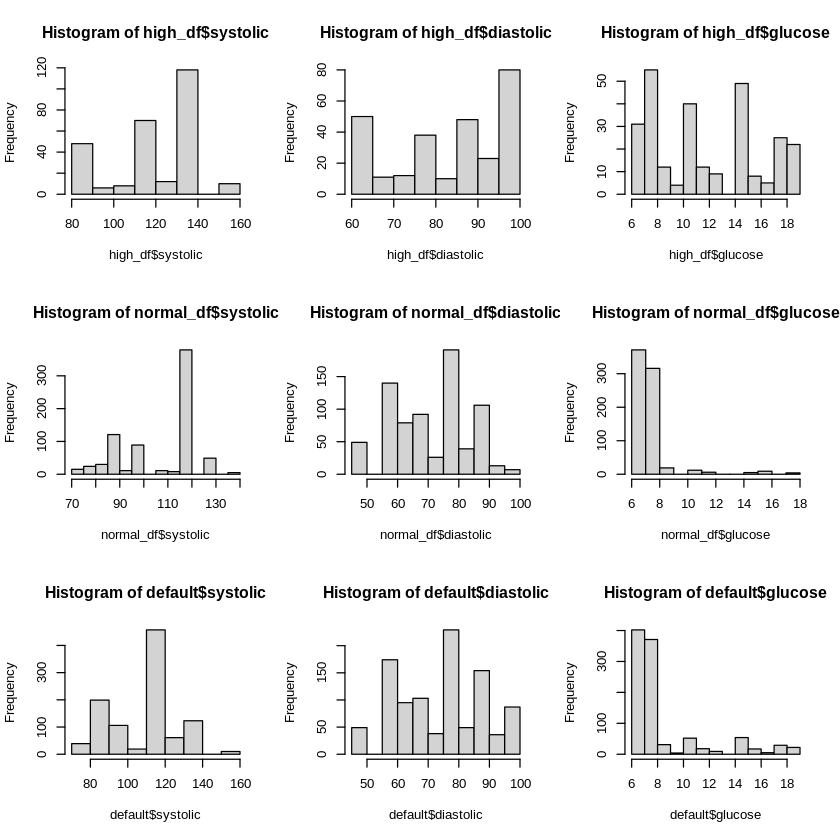

In [43]:
# 3
# Check predictor distributions and implications
# Separate the classes
high_df <- default[default$risk == "1",]
normal_df <- default[default$risk == "0",]
par(mfrow = c(3, 3))
hist(high_df$systolic)
hist(high_df$diastolic)
hist(high_df$glucose)
hist(normal_df$systolic)
hist(normal_df$diastolic)
hist(normal_df$glucose)

hist(default$systolic)
hist(default$diastolic)
hist(default$glucose)


# The Bayesian models assume our data and classes are normally distributed. Here we look at each class by predictor.
# All class histograms are somewhat normal but not extremely strong and the normal_df$glucose is not normal at all.
# The whole dataset is very normally distributed for diastolic and systolic but not glucose.
# Despite being not perfectly distributed we will use bayesian classifications.

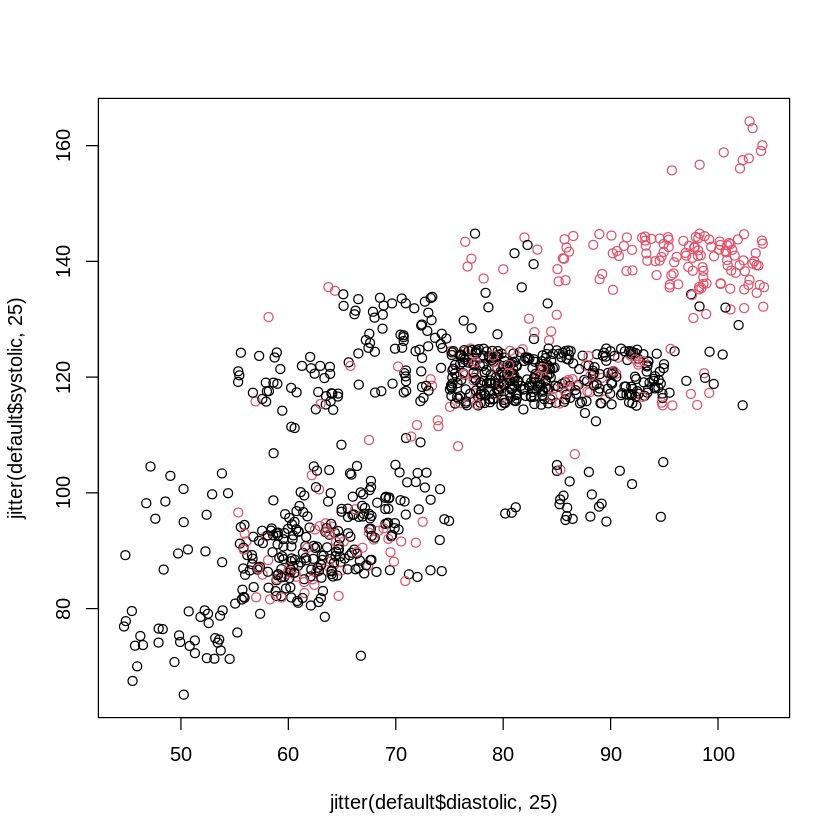

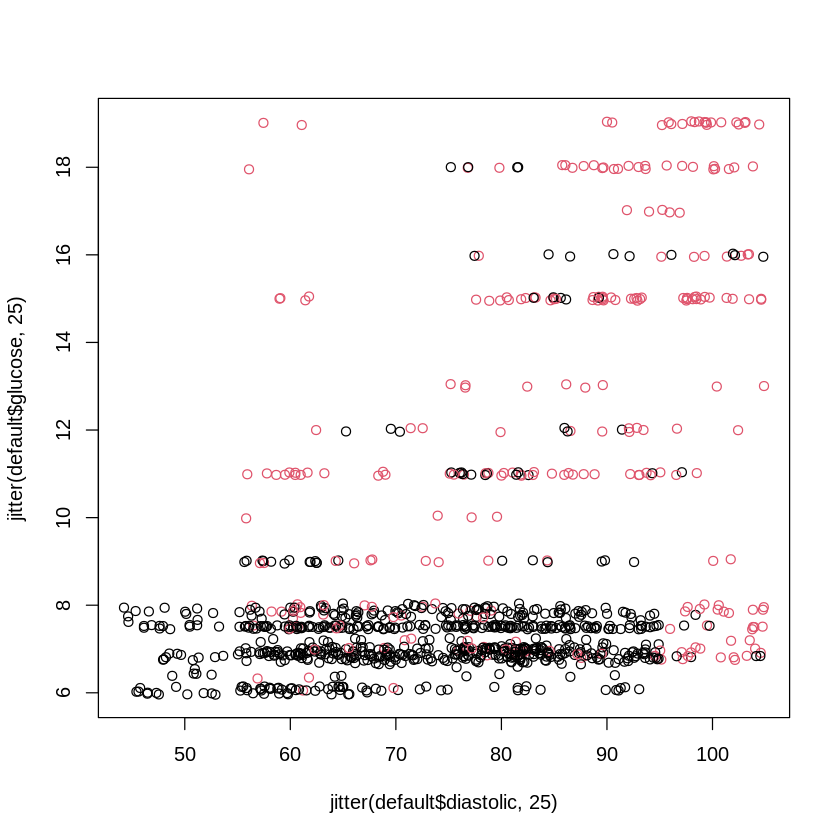

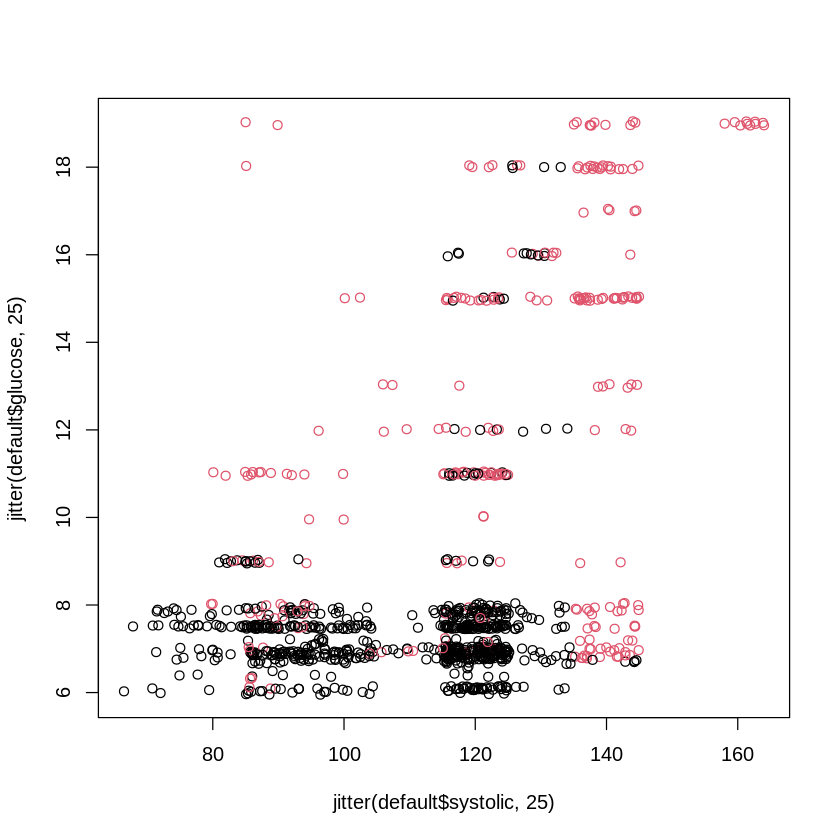

In [42]:
# 4
# what do we see? what are the implications?

# In the diastolic vs systolic we can see the trends is similar between classes and this indicates that LDA could
# be a could model for this. This makes sense in terms of diastolic and systolic pressures as they tend to be related (high D = High S and vice versa)
# and thus are related the same way within class which is an LDA assumption.


# In the other plots between glucose vs diastolic and glucose and systolic pressure we do not see similar trends between classes nor do we see extremely
# differing trends between class with overlap between classes.

# We will try all three models.

# The models are jittered so that points can be distigushed as systolic and diastolic values often land on the same points.

plot(jitter(default$diastolic, 25), jitter(default$systolic,25), col = default$risk)
plot(jitter(default$diastolic,25), jitter(default$glucose,25), col = default$risk)
plot(jitter(default$systolic,25), jitter(default$glucose,25), col = default$risk)


# Classifiers

Choose a classification technique to recommend for this task. Specifically:

1. **Compare logistic regression, Naive Bayes, LDA, and QDA.**
2. **Identify the best technique for this task and explain your choice.**
3. **Build a final model on all the data using that technique.**
4. **Interpret what you see in the model summary.**

In [5]:
install.packages("e1071")
library(e1071) # naiveBayes
library(MASS) # lda, qda

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [6]:
# Full model
# Naive Bayes
classify.nb <- naiveBayes(risk ~ ., data = default)

# LDA classifier
classify.lda <- lda(risk ~ ., data = default)

# QDA classifier
classify.qda <- qda(risk ~ ., data = default)


In [24]:
# Comparisons
install.packages("splitTools")
library(splitTools) # create_folds
library(tidyverse)
# Create CV folds
folds <- create_folds(default$risk, k = 5)

# Naive Bayes error rate
error <- rep(0, 5)
i <- 1

for (train in folds) {
  model <- naiveBayes(risk ~ ., data = default[train,])
  predictions <- predict(model, newdata = default[-train,])
  error[i] <- mean(predictions != default[-train,]$risk)
  i <- i + 1
}

print(paste("Naive Bayes Mean Error:", mean(error)))

# LDA error rate
error <- rep(0, 5)
i <- 1

for (train in folds) {
  model <- lda(risk ~ ., data = default[train,])
  predictions <- predict(model, newdata = default[-train,])$class
  error[i] <- mean(predictions != default[-train,]$risk)
  i <- i + 1
}

print(paste("LDA Mean Error:", mean(error)))

# QDA error rate
error <- rep(0, 5)
i <- 1
# default <- default |> select(glucose, risk)

for (train in folds) {
  model <- qda(risk ~ ., data = default[train,])
  predictions <- predict(model, newdata = default[-train,])$class
  error[i] <- mean(predictions != default[-train,]$risk)
  i <- i + 1
}

print(paste("QDA Mean Error:", mean(error)))


# Logistic Regression Error Rate
error <- rep(0, 5)
i <- 1


for (train in folds){
  model = glm(risk ~ ., data = default[train,], family = binomial)
  prob <- predict(model, newdata = default[-train,], type = "response")
  predictions <- ifelse(prob > 0.5, 1, 0)
  error[i] <- mean(predictions != default[-train,]$risk)
  i <- i + 1
}


print(paste("Logistic Regression Mean Error:", mean(error)))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Naive Bayes Mean Error: 0.118344756817032"
[1] "LDA Mean Error: 0.153832724622796"
[1] "QDA Mean Error: 0.148921009168434"
[1] "Logistic Regression Mean Error: 0.152866868836985"


In [29]:
# Build model of best one on all of data.
# The Naive Bayes model had the lowest MSE for using training data and testing on non-training data.
# This indicates that naive bayes is a better model for generalizing to larger populations it was not trained on and would be able to perform better
# at this level then the rest.
model.nb <- naiveBayes(risk ~ ., data = default)

model.nb
# 1 column is means, 2 is stdevs, and class priors dist


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
        0         1 
0.7317554 0.2682446 

Conditional probabilities:
   systolic
Y       [,1]     [,2]
  0 109.1671 15.89784
  1 124.1949 20.22719

   diastolic
Y       [,1]     [,2]
  0 73.30323 12.39121
  1 85.07353 14.11243

   glucose
Y        [,1]     [,2]
  0  7.480863 1.634471
  1 12.122610 4.173525


I chose a Naive Bayes for the final model because it had the lowest average MSE out of the 4 models. To build the final model I used all of the data as there is no need to withhold testing data. From this model we can see the class priors of low risk (0.732) and high risk (0.268). From here we can then seen the mean (in column 1) and st.dev (in column 2) of each predictor within each risk group. Low risk patients have an avg. systolic BP of 109.1671(w/ stdev of 15.898) while high risk indivduals have an avg systolic pressure of 124.19 (w/ stdev 20.227). This trend can also be seen through out the diastolic and glucose predictors. In all three of these predictors you can see the high risk group has higher averages and much larger st. dev (ie larger distributions) then low risk individuals.